In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Sindhu\OneDrive\Documents\diamonds.csv")
df.head()
df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [4]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [5]:
# 3. Removing duplicates
df = df.drop_duplicates()

In [6]:
# 4. Standardizing categorical values
df['cut'] = df['cut'].str.capitalize()
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()

In [7]:
# 5. Outlier detection and handling (using z-score as an example)
from scipy.stats import zscore
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
df = df[(zscore(df[numerical_cols]) < 3).all(axis=1)]

In [8]:
# 6. Feature Engineering (if applicable, e.g., volume)
df['volume'] = df['x'] * df['y'] * df['z']

# Display cleaned data
print(df)

       carat        cut color clarity  depth  table     x     y     z  price  \
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326   
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326   
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334   
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335   
5       0.24  Very good     J    VVS2   62.8   57.0  3.94  3.96  2.48    336   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...   
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50   2757   
53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61   2757   
53937   0.70  Very good     D     SI1   62.8   60.0  5.66  5.68  3.56   2757   
53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74   2757   
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64   2757   

           volume  
0       38.202030  

In [9]:
df.drop(columns=["x","y","z"],inplace=True)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
5,0.24,Very good,J,VVS2,62.8,57.0,336,38.693952


In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



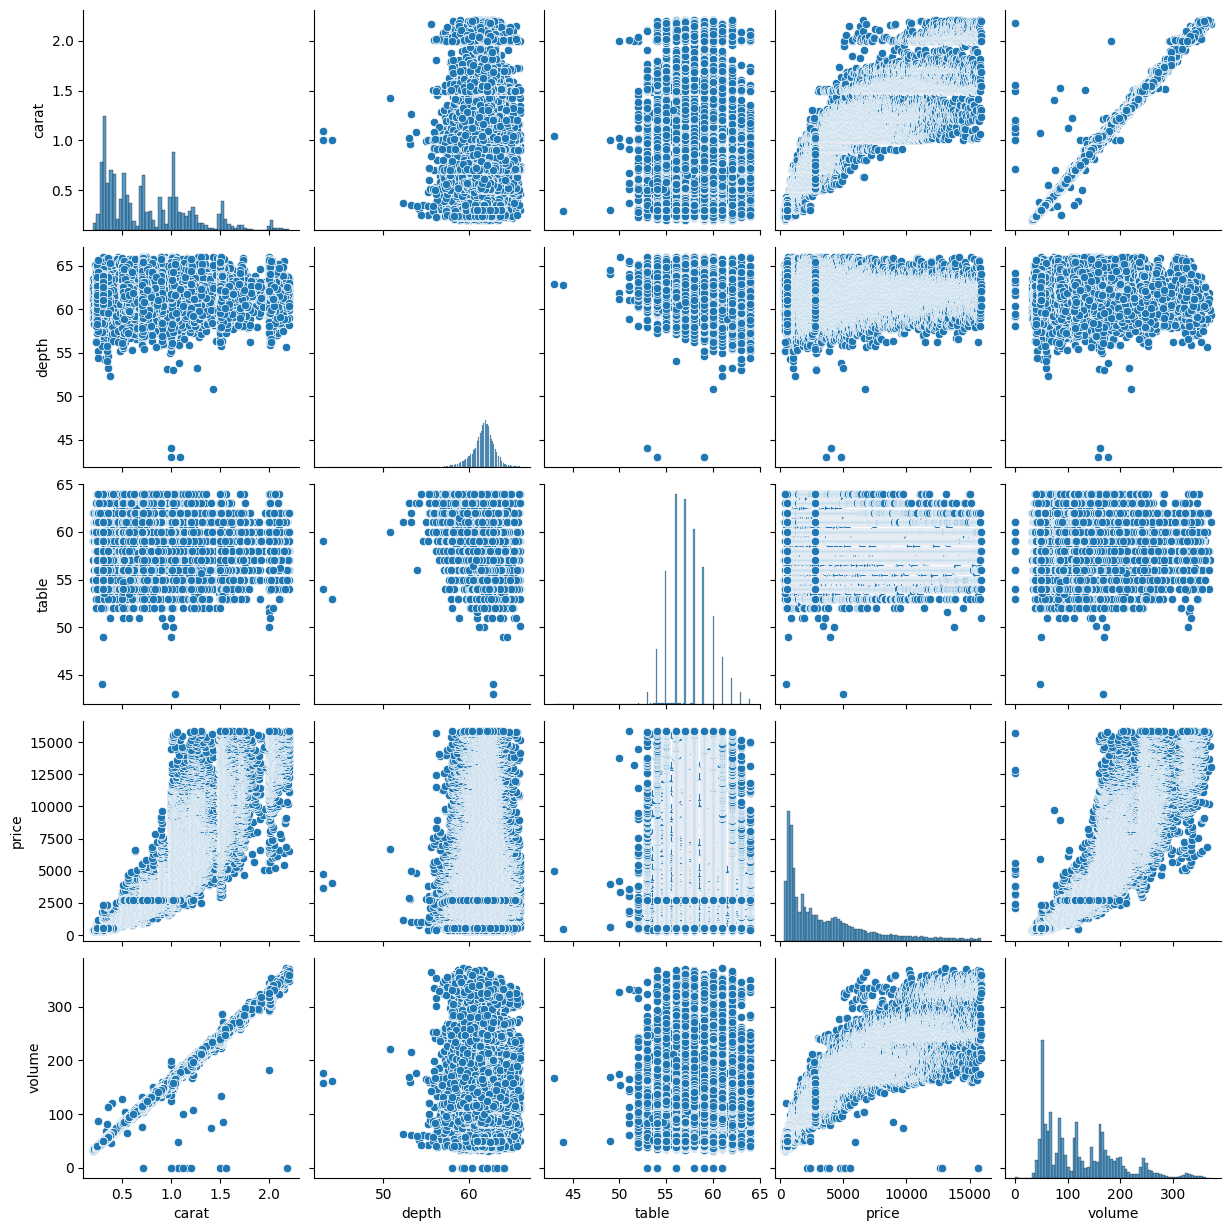

In [12]:
# Create a pair plot
sns.pairplot(df)
plt.show()


In [13]:
#Dropping outliers
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[df["volume"]>20]
df.shape

(51710, 8)

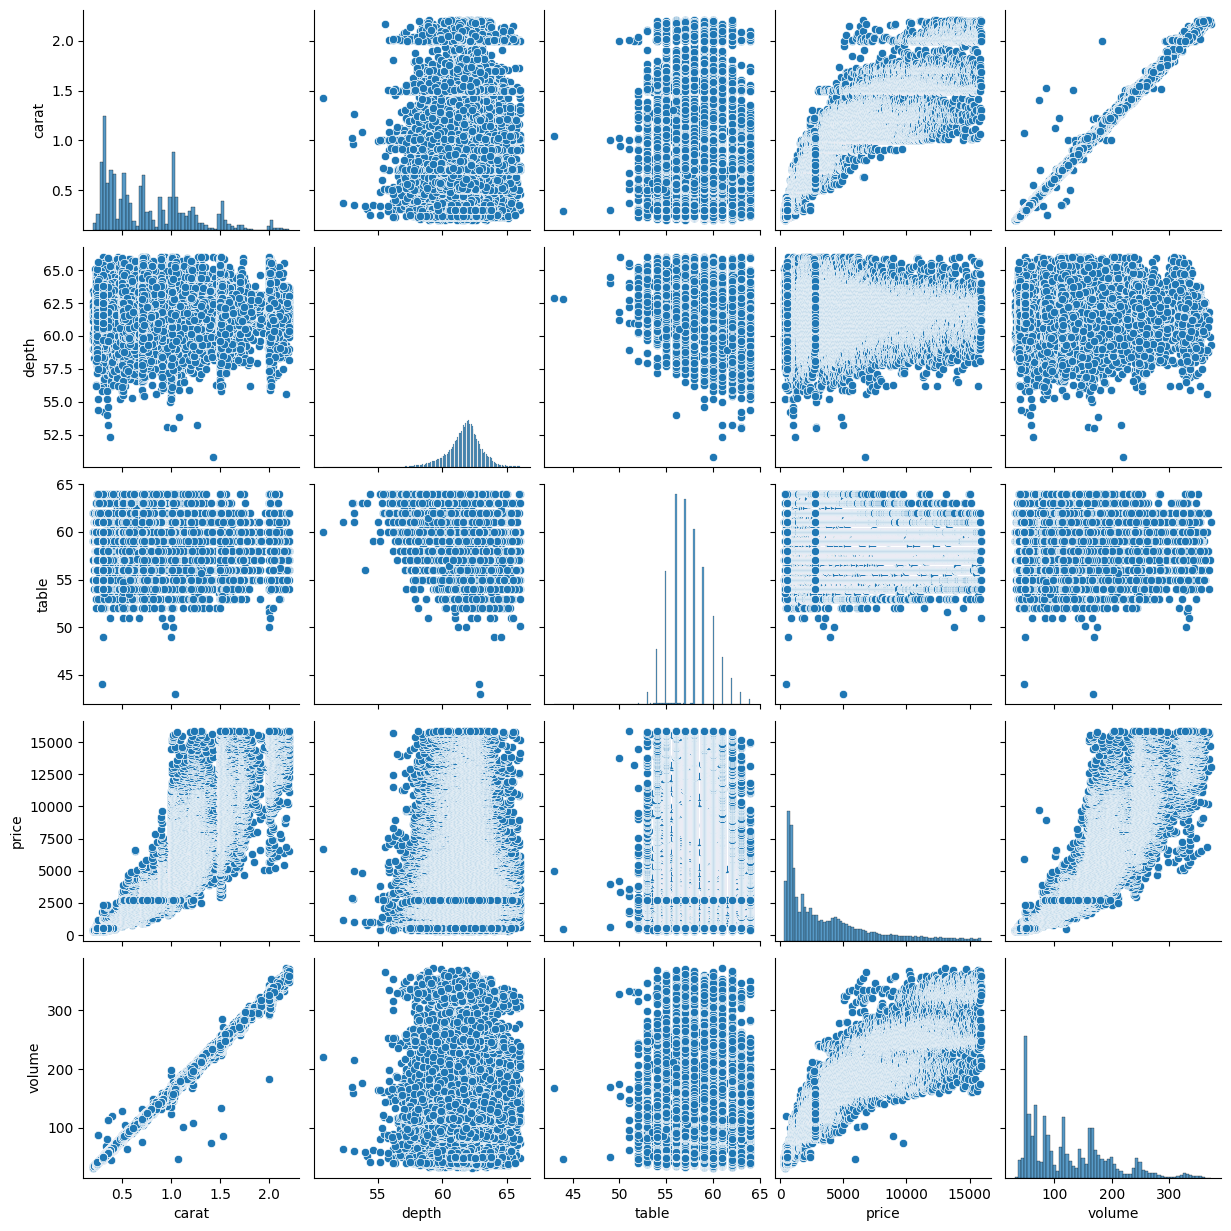

In [14]:
sns.pairplot(df)
plt.show()


In [15]:
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'],drop_first=True)
df_encoded.head()


,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,34.505856,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,46.724580,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,51.917250,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,38.693952,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_encoded.drop(columns=['price'])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=df_encoded["price"]

print(y.head())

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64


In [18]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (41368, 21)
X_test shape: (10342, 21)
y_train shape: (41368,)
y_test shape: (10342,)


In [19]:
#pip install --upgrade numpy


In [20]:
#conda update numpy
!pip install --upgrade protobuf


  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.


In [21]:
!pip install --upgrade h5py

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.12.1
    Uninstalling h5py-3.12.1:
      Successfully uninstalled h5py-3.12.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.2 which is incompatible.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [22]:
from tensorflow.keras.layers import Activation
import tensorflow as tf

def poly_activation(x):
    return tf.square(x)  # This defines a quadratic function

custom_poly_activation = Activation(poly_activation)
model = Sequential()
model.add(Dense(5,activation='relu',input_dim=21))
model.add(Dense(1,activation=custom_poly_activation))

C:\Users\Sindhu\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (464.00 B)

 Trainable params: 116 (464.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,batch_size=50,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0000e+00 - loss: 24494544.0000 - val_accuracy: 0.0000e+00 - val_loss: 14892807.0000
Epoch 2/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 12990123.0000 - val_accuracy: 0.0000e+00 - val_loss: 7355621.5000
Epoch 3/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 6365530.0000 - val_accuracy: 0.0000e+00 - val_loss: 4039863.0000
Epoch 4/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 3399618.0000 - val_accuracy: 0.0000e+00 - val_loss: 2497087.5000
Epoch 5/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 2495574.2500 - val_accuracy: 0.0000e+00 - val_loss: 2246355.7500
Epoch 6/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 2181484.0000 - val_accuracy: 0.0000e+00 - val_loss: 2201661.5000
Epoch 7/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 2101248.2500 - val_accurac

In [26]:
y_pred = model.predict(X_test)
print(y_pred)

324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
[[ 2231.8384]
 [ 6244.5664]
 [ 4047.231 ]
 ...
 [ 2241.7212]
 [ 1111.9441]
 [10982.778 ]]


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


accuracy = r2_score(y_test, y_pred)

print("R^2 Score:", accuracy)

R^2 Score: 0.930496096611023


In [28]:
print(y_test.tail())
y_pred

28140     665
4502     3629
37553     988
29988     716
21582    9683
Name: price, dtype: int64


array([[ 2231.8384],
       [ 6244.5664],
       [ 4047.231 ],
       ...,
       [ 2241.7212],
       [ 1111.9441],
       [10982.778 ]], dtype=float32)

In [29]:
from sklearn.metrics import mean_squared_error

mse_value = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_value)

Mean Squared Error: 812385.5
